**Description**
Neural Network for NAND gate

The truth table is dataset <br>
A	B	Y <br>
0	0	1 <br>
0	1	1 <br>
1	0	1 <br>
1	1	0 <br>



In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1], [1], [1], [0]])  # XOR problem

In [3]:
#Tanh function
def tanh(x):
    return np.tanh(x)


In [4]:
#Derivative of tanh function
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

In [5]:
epoch = 100000
learning_rate = 0.01
input_layer_neurons = 2  # number of features
hidden_layer_neurons = 3  # number of hidden neurons
output_neurons = 1  # number of output neurons

In [6]:
#initializing weights and biases
np.random.seed(0)  # for reproducibility
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))

In [7]:
#Backpropagation algorithm 
for epoch in range(epoch):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = tanh(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output)
    final_output = tanh(final_input)

    # Backward propagation
    error = Y - final_output
    d_final_output = error * tanh_derivative(final_output)

    error_hidden_layer = d_final_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * tanh_derivative(hidden_layer_output)

    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_final_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate


In [8]:
#print final output
print("Final output after training:")
print(final_output)

# Compute the mean squared error
mse = np.mean(np.square(Y - final_output))
print("Mean Squared Error:",mse)

Final output after training:
[[0.00000000e+00]
 [9.98949529e-01]
 [9.99009133e-01]
 [4.02756437e-04]]
Mean Squared Error: 0.2500005618799017


In [9]:
#Test the model with new data
test_data = [0, 1]
hidden_layer_input = np.dot(test_data, weights_input_hidden)
hidden_layer_output = tanh(hidden_layer_input)
final_input = np.dot(hidden_layer_output, weights_hidden_output)
final_output = tanh(final_input)
print("Test data:", test_data)
print("Predicted output:", final_output)
print("Actual output:", Y[1])  # Expected output for XOR(0, 1) is 1

Test data: [0, 1]
Predicted output: [0.99894954]
Actual output: [1]


In [10]:
# Display the weights and biases rounding to 2 decimal places

print("Weights from input to hidden layer:")
print(np.round(weights_input_hidden, 2))  # Use np.round for NumPy arrays

print("Weights from hidden to output layer:")
print(np.round(weights_hidden_output, 2))  # Use np.round for NumPy arrays


Weights from input to hidden layer:
[[-0.81  2.21  1.45]
 [ 1.77 -1.06  1.82]]
Weights from hidden to output layer:
[[-3.37]
 [-2.93]
 [ 4.91]]


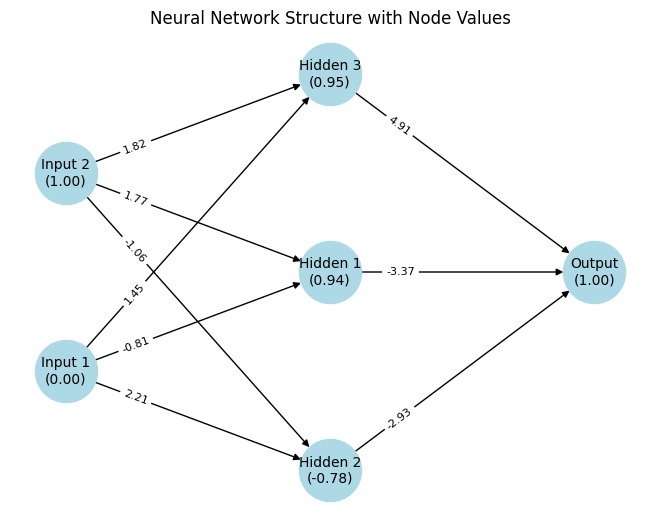

In [11]:
#Plot the netwrork grpahically
import matplotlib.pyplot as plt
import networkx as nx

def plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value):
    import matplotlib.pyplot as plt
    import networkx as nx

    G = nx.DiGraph()

    # Input layer
    for i in range(input_layer_neurons):
        G.add_node(f'Input {i+1}', layer=0, value=input_values[i])  # Assign layer 0 for input nodes

    # Hidden layer
    for i in range(hidden_layer_neurons):
        G.add_node(f'Hidden {i+1}', layer=1, value=hidden_values[i])  # Assign layer 1 for hidden nodes

    # Output layer
    G.add_node('Output', layer=2, value=output_value)  # Assign layer 2 for output node

    # Add edges from input to hidden layer
    for i in range(input_layer_neurons):
        for j in range(hidden_layer_neurons):
            G.add_edge(f'Input {i+1}', f'Hidden {j+1}', weight=round(weights_input_hidden[i][j], 2))

    # Add edges from hidden to output layer
    for i in range(hidden_layer_neurons):
        G.add_edge(f'Hidden {i+1}', 'Output', weight=round(weights_hidden_output[i][0], 2))

    # Use multipartite layout with explicit layer ordering
    pos = nx.multipartite_layout(G, subset_key="layer")

    # Draw the graph
    node_labels = {
        node: f"{node}\n({data['value']:.2f})" if np.isscalar(data['value']) else f"{node}\n({data['value'].item():.2f})"
        for node, data in G.nodes(data=True)
    }  # Add node values
    edge_labels = {
        (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)
    }  # Round edge weights to 2 decimal places

    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.25
    )  # Adjust label_pos to avoid overlap
    plt.title("Neural Network Structure with Node Values")
    plt.show()

# Example usage
input_values = [0, 1]  # Example input values
hidden_layer_input = np.dot(input_values, weights_input_hidden)
hidden_values = tanh(hidden_layer_input)  # Hidden layer activations
final_input = np.dot(hidden_values, weights_hidden_output)
output_value = tanh(final_input)  # Output value

plot_neural_network(weights_input_hidden, weights_hidden_output, input_values, hidden_values, output_value)

In [12]:
#